# LSA

In this work you will calculate word embeddings using LSA for arbitrary text and explore their properties.

Code from [Yuri Guts's Thrones2Vec](https://github.com/YuriyGuts/thrones2vec/blob/master/Thrones2Vec.ipynb) is used.

In [1]:
%env LC_ALL=en_US.UTF-8
%env LANG=en_US.UTF-8

import nltk
import glob
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

env: LC_ALL=en_US.UTF-8
env: LANG=en_US.UTF-8


## Corpus preprocessing

First, download your text into folder `./data/lab1` in `txt` format:

In [2]:
book_filenames = glob.glob("../data/lab1/*.txt")
print("Found books: \n{}".format('\n'.join(book_filenames)))

Found books: 
../data/lab1/001ssb.txt
../data/lab1/002ssb.txt
../data/lab1/003ssb.txt
../data/lab1/004ssb.txt
../data/lab1/005ssb.txt


In [3]:
corpus  = ""
for book_filename in book_filenames:
    print("Reading '{0}'...".format(book_filename))
    with open(book_filename, "r", ) as f:
        corpus += f.read()
    print("Corpus is now {0} characters long.\n".format(len(corpus)))

Reading '../data/lab1/001ssb.txt'...
Corpus is now 1607894 characters long.

Reading '../data/lab1/002ssb.txt'...
Corpus is now 3392960 characters long.

Reading '../data/lab1/003ssb.txt'...
Corpus is now 5714229 characters long.

Reading '../data/lab1/004ssb.txt'...
Corpus is now 7437782 characters long.

Reading '../data/lab1/005ssb.txt'...
Corpus is now 9749792 characters long.



We need to split our corpus on documents and split document on terms. Use English tokenizers from NLTK or create your own function.

In [4]:
nltk.download("punkt")
nltk_english = nltk.data.load('tokenizers/punkt/english.pickle')
document_tokenize = lambda corpus: nltk_english.tokenize(corpus)

from nltk import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anatolii.stehnii/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
documents_raw = document_tokenize(corpus)
documents = list(map(word_tokenize, documents_raw))

Add your preprocessing if needed or use default:

In [6]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def preprocess(word):
    clean = re.sub("[^a-zA-Z]","", word)
    clean_lower = clean.lower()
    return ps.stem(clean_lower)

documents = [[preprocess(word) for word in document] for document in documents]
documents = [[word for word in document if word] for document in documents]

In [7]:
print(documents_raw[5])
print(documents[5])

He was an old man, past fifty, and he had seen the lordlings come and go.
['he', 'wa', 'an', 'old', 'man', 'past', 'fifti', 'and', 'he', 'had', 'seen', 'the', 'lordl', 'come', 'and', 'go']


In [8]:
token_count = sum([len(document) for document in documents])
print("The corpus contains {0:,} tokens in {1:,} documents".format(token_count, len(documents)))

The corpus contains 1,807,788 tokens in 158,737 documents


Define your threshold for a minimum word occurence in the text to filter rare words.

In [9]:
# Minimum word count threshold.
min_word_count = 3

vocab = {}
for d in documents:
    for w in d:
        if w in vocab:
            vocab[w] += 1
        else:
            vocab[w] = 1

rare_words = {w for w, count in vocab.items() if count < min_word_count}
print("The corpus contains {0:,} unique words, {1:,} with less than {2:} occurences.".format(len(vocab), len(rare_words), min_word_count))

The corpus contains 16,279 unique words, 6,114 with less than 3 occurences.


Define your own set of stop words or use default from NLTK:

In [45]:
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words = set()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anatolii.stehnii/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
remove_words = rare_words | stop_words
documents = [[word for word in document if word not in remove_words] for document in documents]

print(documents[5])
all_words = {word for document in documents for word in document}
print("A filtered corpus contains {} unique words".format(len(all_words)))

['he', 'wa', 'an', 'old', 'man', 'past', 'fifti', 'and', 'he', 'had', 'seen', 'the', 'lordl', 'come', 'and', 'go']
A filtered corpus contains 10165 unique words


## Term-document matrix

Here you need to transform your corpus into term-document matrix of any type you want (BoW, TF-IDF). Use a sparse matrix, if you have large amount of data. Don't forget to save your vocabulary so you can restore a row index for each word.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
documents_raw_join = [' '.join(words) for words in documents]
td_matrix = vectorizer.fit_transform(documents_raw_join)
vocab = vectorizer.get_feature_names()

## SVD

Perform SVD of term-document matrix and reduce it's dimensionality to n_dim components. 

In [47]:
n_dim = 2

In [48]:
from scipy.sparse.linalg import svds
u, s, vh = svds(td_matrix, k=n_dim)

In [49]:
word_ebeddings = u

## Explore result

Select a set of words you would like to explore.

In [52]:
words = ['he', 'she', 'king', 'queen']
indexes = [vocab.index(word) for word in words]

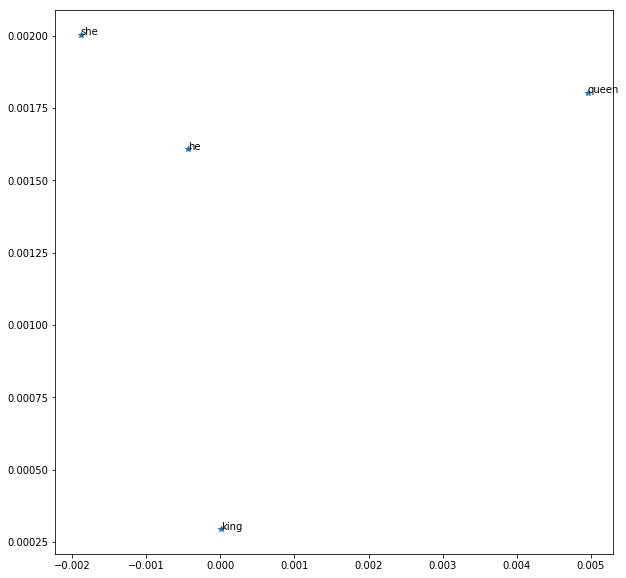

In [53]:
plt.figure()
coordinates  = [word_ebeddings[i,0:2] for i in indexes]
xdata, ydata = zip(*coordinates)
plt.plot(xdata, ydata, '*')
for c, word in zip(coordinates, words):
    plt.text(c[0], c[1], word)
plt.show()